# Price recommmendation - Polynomial Regression
## Chapter 6
### Predictive Analytics for the Modern Enterprise 

This is jupyter notebook that can be used to follow along the code examples for Chapter 6 Section 1 - Unsupervised learning of the book. The code examples go through some of the functionality that can be used to work with the sci-kit learn library in Python to work with unsupervised learning models. 

The notebook has been tested using the following pre-requisite:

Python V3.9.13 - https://www.python.org/
Anaconda Navigator V3 for Python 3.9 - https://www.anaconda.com/
Jupyter - V6.4.12 - https://jupyter.org/
Desktop computer - macOS Ventura V13.1

Documentation referece for Scikit Learn: https://scikit-learn.org/stable/

### Pre-requisites


You will need to install the scikit-learn package in your envionrment. 
In your environment run the following command

```bash
conda install -c conda-forge scikit-learn
```
OR
```bash
pip install -U scikit-learn
```

### Training and predicting with a Linear Regression Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle #Saving and loading models

from sklearn import preprocessing #For preprocessing predictors
from sklearn import model_selection, metrics #To perform model cross validation and scoring
from sklearn.linear_model     import LinearRegression # The linear regression class in scikit learn supports polynomial regression
from sklearn.model_selection  import train_test_split # To create testing and training splits of data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #modeling scoring metrics
from sklearn.preprocessing import PolynomialFeatures #Preprocessing class to generate polynomail features

In [2]:
%matplotlib inline

In [3]:
url = "../datasets/prod_temp.csv" #Import sales data with temperature information
sales = pd.read_csv(url) #Read the data from the URL in a Pandas dataframe
predictors = ['price','max_temp']
predicted = ['sales_quantity']

sales = sales.copy()
sales = sales[sales['item_code'] == 52] #We are interested in Item_id=52
sales

,day,price,sales_quantity,max_temp,item_code
0,0,1.00,11447.0,8.0,52
1,1,1.00,12478.0,25.0,52
2,2,1.01,11739.0,19.0,52
3,3,1.01,13090.0,23.0,52
4,4,1.02,12951.0,14.0,52
...,...,...,...,...,...
295,295,2.96,8775.0,24.0,52
296,296,2.97,6840.0,35.0,52
297,297,2.98,7175.0,9.0,52
298,298,2.99,7764.0,15.0,52


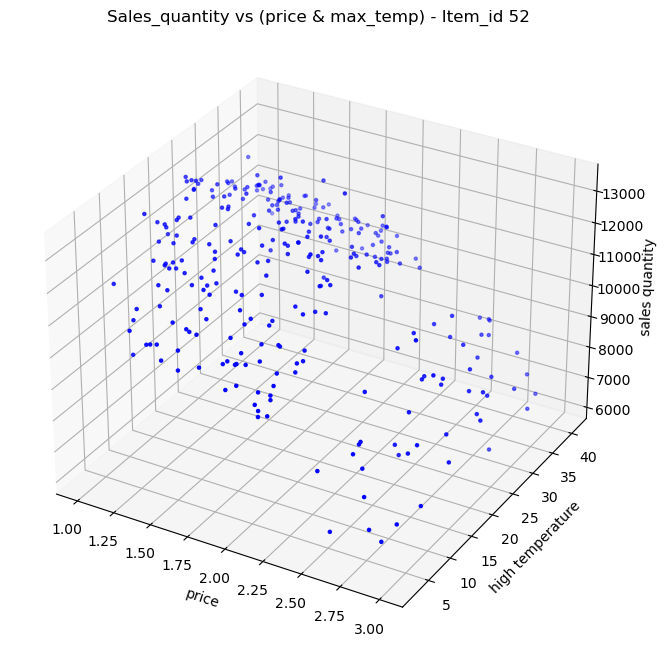

In [4]:
#Get plotting data
x=sales['price'] 
y=sales['max_temp']
z=sales['sales_quantity']

#Plot the data in 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='.')

#Set axis labels
ax.set_xlabel('price')
ax.set_ylabel('high temperature')
ax.set_zlabel('sales quantity')

plt.title('Sales_quantity vs (price & max_temp) - Item_id 52')
plt.show()

In [5]:
#Preprocessing the predictors to scale them 
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(sales[predictors])
sales[predictors] = scaler.transform(sales[predictors])
sales

,day,price,sales_quantity,max_temp,item_code
0,0,0.000,11447.0,0.153846,52
1,1,0.000,12478.0,0.589744,52
2,2,0.005,11739.0,0.435897,52
3,3,0.005,13090.0,0.538462,52
4,4,0.010,12951.0,0.307692,52
...,...,...,...,...,...
295,295,0.980,8775.0,0.564103,52
296,296,0.985,6840.0,0.846154,52
297,297,0.990,7175.0,0.179487,52
298,298,0.995,7764.0,0.333333,52


In [21]:
#Polynomial Range
degree_min = 1
degree_max = 5

# Train models with increasing polynomail degree and compare scoring metrics
for poly_d in range(degree_min,degree_max+1):
    poly_gen = PolynomialFeatures(degree=poly_d, include_bias=False) #Polynomial generator
    poly_features = poly_gen.fit_transform(sales[predictors]) #Generate polynomial features
    X_train, X_test, y_train, y_test = train_test_split(poly_features, sales[predicted], train_size=0.75, random_state=110) #create Test/Train split
    
    poly_reg_model = LinearRegression() #Define the model
    poly_reg_model.fit(X_train, y_train) #Fit the model
    poly_reg_y_predicted = poly_reg_model.predict(X_test) #predict based on test data
    
    r2 = r2_score(y_test, poly_reg_y_predicted) #R-squared score
    rmse = mean_squared_error(y_test, poly_reg_y_predicted, squared=False) #Root Mean Squared Error
    mae = mean_absolute_error(y_test, poly_reg_y_predicted) #Mean Absolute Error
    
    print("Degree: ", poly_d)
    print("R-Squared: ",r2 )
    print("RMSE: ",rmse) 
    print("MAE: ",mae, "\n")
    
    file1 = "model" + str(poly_d)
    file2 = file1 + "_poly"
    pickle.dump(poly_reg_model, open(file1, "wb")) #Store the model in a file at each iteration
    pickle.dump(poly_gen, open(file2, "wb")) #Store the polynomial feature generator model in a file at each iteration

Degree:  1
R-Squared:  0.7555878925181353
RMSE:  702.5486307222614
MAE:  540.3235750718317 

Degree:  2
R-Squared:  0.939814908354836
RMSE:  348.62577831543143
MAE:  266.23974517544724 

Degree:  3
R-Squared:  0.9404913067261539
RMSE:  346.66120372506697
MAE:  250.0739785467517 

Degree:  4
R-Squared:  0.9289660375632582
RMSE:  378.7459995873113
MAE:  261.717857750582 

Degree:  5
R-Squared:  0.9234899816986993
RMSE:  393.0738809418268
MAE:  270.37503329570393 



In [29]:
poly_d = 3 #Use third degree polynomial
file1 = "model" + str(poly_d)
file2 = file1 + "_poly"
poly_reg_model = pickle.load(open(file1, "rb")) #Load 3rd degree polynomial model
poly_gen = pickle.load(open(file2, "rb")) #Load polynomial generator model

predict_test = pd.DataFrame([2,2,2],columns=['price'])
predict_test['max_temp'] = [5,22,45]                           
predict_test = scaler.transform(predict_test) #Scale features
predict_poly_features = poly_gen.fit_transform(predict_test) #Generate polynomail features from sample
predicted_test = poly_reg_model.predict(predict_poly_features) #Use the model to make predictions
predicted_test

model3 model3_poly


array([[10371.62028047],
       [11703.81900753],
       [ 9028.39953932]])

In [10]:
xy = np.mgrid[5:40:0.1,1:3:0.05].reshape(2,-1).T  #Generate synthetic feature data
syn_data = pd.DataFrame(xy[:,1],columns=['price']) #Assign generated feature data to a pandas dataframe
syn_data['max_temp'] = xy[:,0]

In [11]:
syn_data_scaled = syn_data.copy()
syn_data_scaled[predictors] = scaler.transform(syn_data_scaled[predictors]) #Scale features
predict_poly_features = poly_gen.fit_transform(syn_data_scaled[predictors])
predicted_test = poly_reg_model.predict(predict_poly_features)

xp=xy[:,1] 
yp=xy[:,0]
zp=predicted_test

# Plot predictions
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp, yp, zp, c='red', marker='.') #Predictions
ax.scatter(x, y, z, c='blue', marker='.') #Actual data

ax.set_xlabel('price')
ax.set_ylabel('high temperature')
ax.set_zlabel('sales quantity')

plt.title('Prediction of Sales_quantity vs (price & max_temp) - Item_id 52')
plt.show()


ValueError: X has 20 features, but LinearRegression is expecting 9 features as input.

In [ ]:
syn_data['sales_quantity'] = predicted_test
syn_data['sales_quantity'] = syn_data['sales_quantity'].round(decimals = 0)
syn_data['total'] = syn_data['price'] * syn_data['sales_quantity']
syn_data

In [ ]:
ref_temp = 39 #Assume high temperature to be 30. 
ref_data = syn_data[syn_data['max_temp'] == ref_temp] #Obtain all referece data for this temperature

ymax = max(ref_data['total']) #Maximum value for total sales rales revenue in our data subset
xmax = ref_data.loc[ref_data.total == ymax,'price'].values[0] #Optimal item price for the maximum total sales

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
line = ax.plot(ref_data['price'], ref_data['total'])#Plot total sales revenue vs item price

ax.annotate(xmax, xy=(xmax, ymax), xytext=(xmax, ymax + 2000), arrowprops=dict(facecolor='red'),) #Label the maximum point with the price value

ax.axvline(xmax, color='red', linestyle='dashed') #Vertical line for price
ax.axhline(ymax, color='red', linestyle='dashed') #Horizontal line for total sales revenue

plt.title("Sales revenue variation vs price\nItem_id=52 max_temp=30", fontdict={'horizontalalignment': 'right'})
plt.xlabel(predictors) 
plt.ylabel('Total sales revenue / day')

plt.show()

In [ ]:
print("Optimal selling price: ", xmax)
print("Maximum Daily sale: ", ymax)